In [167]:
#import libraries
import requests
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Question 1

In [168]:
## URL of the data
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user"
#Import the data from csv
users = pd.read_csv(url,sep="|")

In [169]:
##Find the mean of age of users by grouping the data by occupation
mean_age_by_occ = users.groupby('occupation')['age'].mean()
##Print the result
print("Mean of age by occupation:\n",mean_age_by_occ.round(2))

Mean of age by occupation:
 occupation
administrator    38.75
artist           31.39
doctor           43.57
educator         42.01
engineer         36.39
entertainment    29.22
executive        38.72
healthcare       41.56
homemaker        32.57
lawyer           36.75
librarian        40.00
marketing        37.62
none             26.56
other            34.52
programmer       33.12
retired          63.07
salesman         35.67
scientist        35.55
student          22.08
technician       33.15
writer           36.31
Name: age, dtype: float64


In [170]:
## Group by genders
users["is_male"] = users['gender']=="M"
# print(users)
num_count = users[users['is_male']==True].groupby(['occupation'])['gender'].count()
den_count = users.groupby(['occupation'])['gender'].count()
male_ratio_per_occ = num_count/den_count
print("Male Ratio Per Occupation:\n",male_ratio_per_occ.round(2))

Male Ratio Per Occupation:
 occupation
administrator    0.54
artist           0.54
doctor           1.00
educator         0.73
engineer         0.97
entertainment    0.89
executive        0.91
healthcare       0.31
homemaker        0.14
lawyer           0.83
librarian        0.43
marketing        0.62
none             0.56
other            0.66
programmer       0.91
retired          0.93
salesman         0.75
scientist        0.90
student          0.69
technician       0.96
writer           0.58
Name: gender, dtype: float64


In [171]:
#Min and max age for each occupation
users.groupby('occupation').age.agg(['min', 'max'])

,min,max
occupation,,
administrator,21,70
artist,19,48
doctor,28,64
educator,23,63
engineer,22,70
entertainment,15,50
executive,22,69
healthcare,22,62
homemaker,20,50


In [172]:
#combination of occupation and sex, calculate the mean age
users.groupby(['occupation', 'gender']).age.mean().round(2)

occupation     gender
administrator  F         40.64
               M         37.16
artist         F         30.31
               M         32.33
doctor         M         43.57
educator       F         39.12
               M         43.10
engineer       F         29.50
               M         36.60
entertainment  F         31.00
               M         29.00
executive      F         44.00
               M         38.17
healthcare     F         39.82
               M         45.40
homemaker      F         34.17
               M         23.00
lawyer         F         39.50
               M         36.20
librarian      F         40.00
               M         40.00
marketing      F         37.20
               M         37.88
none           F         36.50
               M         18.60
other          F         35.47
               M         34.03
programmer     F         32.17
               M         33.22
retired        F         70.00
               M         62.54
salesman       F 

In [173]:
#Percentage of male to female for each occupation
num_count = users.groupby(['occupation','gender'])['gender'].count()
den_count = users.groupby(['occupation'])['gender'].count()
gend_ratio_per_occ = num_count/den_count
print("Ratio Per Occupation:\n",(gend_ratio_per_occ * 100).round(2))

Ratio Per Occupation:
 occupation     gender
administrator  F          45.57
               M          54.43
artist         F          46.43
               M          53.57
doctor         M         100.00
educator       F          27.37
               M          72.63
engineer       F           2.99
               M          97.01
entertainment  F          11.11
               M          88.89
executive      F           9.38
               M          90.62
healthcare     F          68.75
               M          31.25
homemaker      F          85.71
               M          14.29
lawyer         F          16.67
               M          83.33
librarian      F          56.86
               M          43.14
marketing      F          38.46
               M          61.54
none           F          44.44
               M          55.56
other          F          34.29
               M          65.71
programmer     F           9.09
               M          90.91
retired        F           

## Question 2

In [174]:
#Import data from link
data_link = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv"
euro12 = pd.read_csv(data_link)
euro12

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,12,70.6%,35,30,3,5,0,7,7,15
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,6,66.7%,48,56,3,7,1,7,7,17


In [175]:
#Select Goals
euro12_goals = euro12['Goals']
euro12_goals

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

In [176]:
#Distinct Teams of 2012
print("Teams: ",euro12['Team'].unique())
#Number of teams
print("Number of teams: ",euro12['Team'].unique().size)

Teams:  ['Croatia' 'Czech Republic' 'Denmark' 'England' 'France' 'Germany'
 'Greece' 'Italy' 'Netherlands' 'Poland' 'Portugal' 'Republic of Ireland'
 'Russia' 'Spain' 'Sweden' 'Ukraine']
Number of teams:  16


In [177]:
#Number of columns in the dataset
print("Number of columns:",euro12.shape[1])

Number of columns: 35


In [178]:
#View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline
discipline = euro12[['Team','Yellow Cards','Red Cards']]
print(discipline)

                   Team  Yellow Cards  Red Cards
0               Croatia             9          0
1        Czech Republic             7          0
2               Denmark             4          0
3               England             5          0
4                France             6          0
5               Germany             4          0
6                Greece             9          1
7                 Italy            16          0
8           Netherlands             5          0
9                Poland             7          1
10             Portugal            12          0
11  Republic of Ireland             6          1
12               Russia             6          0
13                Spain            11          0
14               Sweden             7          0
15              Ukraine             5          0


In [179]:
#Sort by red and then yellow
discipline.sort_values(['Red Cards','Yellow Cards'])

,Team,Yellow Cards,Red Cards
2,Denmark,4,0
5,Germany,4,0
3,England,5,0
8,Netherlands,5,0
15,Ukraine,5,0
4,France,6,0
12,Russia,6,0
1,Czech Republic,7,0
14,Sweden,7,0
0,Croatia,9,0


In [180]:
#Calculate the mean Yellow Cards given per Team
discipline.groupby('Team')['Yellow Cards'].mean()

Team
Croatia                 9
Czech Republic          7
Denmark                 4
England                 5
France                  6
Germany                 4
Greece                  9
Italy                  16
Netherlands             5
Poland                  7
Portugal               12
Republic of Ireland     6
Russia                  6
Spain                  11
Sweden                  7
Ukraine                 5
Name: Yellow Cards, dtype: int64

In [181]:
# Filter teams that scored more than 6 goals
euro12[euro12['Goals'] > 6]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


In [182]:
# Select the teams that start with G
euro12[euro12['Team'].str.startswith('G')]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


In [183]:
#Select the first 7 columns
euro12[euro12.columns[0:7]]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


In [184]:
#Select all columns except the last 3
euro12[euro12.columns[0:-3]]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


In [185]:
#Present only the Shooting Accuracy from England, Italy and Russia
euro12[euro12['Team'].isin(['England','Italy','Russia'])]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
12,Russia,5,9,31,22.5%,12.5%,59,2,0,0,...,10,77.0%,34,43,4,6,0,7,7,16


## Question 3

Step 2. Create 3 differents Series, each of length 100, as follows:
• The first a random number from 1 to 4
• The second a random number from 1 to 3
• The third a random number from 10,000 to 30,000

In [186]:
df1 = pd.Series(np.random.randint(1,5,100))
df2 = pd.Series(np.random.randint(1,4,100))
df3 = pd.Series(np.random.randint(10000,30001,100))
df1

0     4
1     1
2     1
3     1
4     2
     ..
95    3
96    4
97    3
98    4
99    3
Length: 100, dtype: int32

In [187]:
df2

0     1
1     3
2     3
3     3
4     1
     ..
95    2
96    1
97    3
98    2
99    2
Length: 100, dtype: int32

In [188]:
df3

0     22823
1     27890
2     29731
3     21373
4     13231
      ...  
95    17625
96    20683
97    21027
98    14330
99    21940
Length: 100, dtype: int32

Step 3. Create a DataFrame by joinning the Series by column


In [189]:
housing = pd.concat([df1,df2,df3], axis=1)
housing

,0,1,2
0,4,1,22823
1,1,3,27890
2,1,3,29731
3,1,3,21373
4,2,1,13231
...,...,...,...
95,3,2,17625
96,4,1,20683
97,3,3,21027
98,4,2,14330


Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter

In [190]:
housing = housing.rename(columns={0:'bedrs', 1:'bathrs', 2:'price_sqr_meter'})

In [191]:
housing

,bedrs,bathrs,price_sqr_meter
0,4,1,22823
1,1,3,27890
2,1,3,29731
3,1,3,21373
4,2,1,13231
...,...,...,...
95,3,2,17625
96,4,1,20683
97,3,3,21027
98,4,2,14330


Step 5. Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'


In [192]:
bigcolumn = housing.unstack().to_frame().reset_index()
bigcolumn

,level_0,level_1,0
0,bedrs,0,4
1,bedrs,1,1
2,bedrs,2,1
3,bedrs,3,1
4,bedrs,4,2
...,...,...,...
295,price_sqr_meter,95,17625
296,price_sqr_meter,96,20683
297,price_sqr_meter,97,21027
298,price_sqr_meter,98,14330


Step 6. Ops it seems it is going only until index 99. Is it true?

Yes, it is true

Step 7. Reindex the DataFrame so it goes from 0 to 299


In [193]:
bigcolumn.reset_index(drop=True, inplace=True)
bigcolumn.set_index(pd.RangeIndex(0,len(bigcolumn)))
bigcolumn

,level_0,level_1,0
0,bedrs,0,4
1,bedrs,1,1
2,bedrs,2,1
3,bedrs,3,1
4,bedrs,4,2
...,...,...,...
295,price_sqr_meter,95,17625
296,price_sqr_meter,96,20683
297,price_sqr_meter,97,21027
298,price_sqr_meter,98,14330


## Question 4

In [194]:
data = pd.read_csv('wind.txt',sep=" ")
data

,Yr,Mo,Dy,Unnamed: 3,RPT,Unnamed: 5,VAL,Unnamed: 7,ROS,Unnamed: 9,...,Unnamed: 17,CLA,Unnamed: 19,MUL,Unnamed: 21,CLO,Unnamed: 23,BEL,Unnamed: 25,MAL
0,61,1,1,15.04,14.96,13.17,9.29,NaN,NaN,9.87,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,61,1,2,14.71,NaN,NaN,10.83,6.50,12.62,7.67,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,61,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,61,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,61,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,78,12,27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6570,78,12,28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6571,78,12,29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6572,78,12,30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [195]:
data["Yr"] = data["Yr"].apply(lambda x: int("20"+str(x)) if(x< 22) else int("19"+str(x)) )
data

,Yr,Mo,Dy,Unnamed: 3,RPT,Unnamed: 5,VAL,Unnamed: 7,ROS,Unnamed: 9,...,Unnamed: 17,CLA,Unnamed: 19,MUL,Unnamed: 21,CLO,Unnamed: 23,BEL,Unnamed: 25,MAL
0,1961,1,1,15.04,14.96,13.17,9.29,NaN,NaN,9.87,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1961,1,2,14.71,NaN,NaN,10.83,6.50,12.62,7.67,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1961,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1961,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1961,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,1978,12,27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6570,1978,12,28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6571,1978,12,29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6572,1978,12,30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [196]:
data['Yr'] = data['Yr'].astype('str').str.replace('.0', '', regex=False)
data['Mo'] = data['Mo'].astype('str').str.replace('.0', '', regex=False)
data['Dy'] = data['Dy'].astype('str').str.replace('.0', '', regex=False)

data["date"] = data.apply(lambda x:'%s-%s-%s' % (x['Yr'],x['Mo'],x['Dy']),axis=1)
data = data.drop(["Yr","Mo","Dy"],axis=1)

In [197]:
data.index = data["date"]
data

,Unnamed: 3,RPT,Unnamed: 5,VAL,Unnamed: 7,ROS,Unnamed: 9,KIL,Unnamed: 11,SHA,...,CLA,Unnamed: 19,MUL,Unnamed: 21,CLO,Unnamed: 23,BEL,Unnamed: 25,MAL,date
date,,,,,,,,,,,,,,,,,,,,,
1961-1-1,15.04,14.96,13.17,9.29,NaN,NaN,9.87,13.67,10.25,10.83,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1961-1-1
1961-1-2,14.71,NaN,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1961-1-2
1961-1-3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,NaN,8.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1961-1-3
1961-1-4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1961-1-4
1961-1-5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1961-1-5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1978-12-27
1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1978-12-28
1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1978-12-29


In [198]:
data["date"] = pd.to_datetime(data["date"],errors='coerce')

In [199]:
data["date"]

date
1961-1-1     1961-01-01
1961-1-2     1961-01-02
1961-1-3     1961-01-03
1961-1-4     1961-01-04
1961-1-5     1961-01-05
                ...    
1978-12-27   1978-12-27
1978-12-28   1978-12-28
1978-12-29   1978-12-29
1978-12-30   1978-12-30
1978-12-31   1978-12-31
Name: date, Length: 6574, dtype: datetime64[ns]

In [200]:
#Get null values count
data.isna().sum()

Unnamed: 3        6
RPT               9
Unnamed: 5        5
VAL               6
Unnamed: 7        7
ROS               3
Unnamed: 9        3
KIL               4
Unnamed: 11       4
SHA               5
Unnamed: 13       2
BIR               3
Unnamed: 15    6550
DUB            6573
Unnamed: 17    6573
CLA            6574
Unnamed: 19    6574
MUL            6574
Unnamed: 21    6574
CLO            6574
Unnamed: 23    6574
BEL            6574
Unnamed: 25    6574
MAL            6574
date              0
dtype: int64

In [201]:
data.shape #Check number of rows and columns

(6574, 25)

In [202]:
#Get non-missing values count
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6574 entries, 1961-1-1 to 1978-12-31
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Unnamed: 3   6568 non-null   float64       
 1   RPT          6565 non-null   float64       
 2   Unnamed: 5   6569 non-null   float64       
 3   VAL          6568 non-null   float64       
 4   Unnamed: 7   6567 non-null   float64       
 5   ROS          6571 non-null   float64       
 6   Unnamed: 9   6571 non-null   float64       
 7   KIL          6570 non-null   float64       
 8   Unnamed: 11  6570 non-null   float64       
 9   SHA          6569 non-null   float64       
 10  Unnamed: 13  6572 non-null   float64       
 11  BIR          6571 non-null   float64       
 12  Unnamed: 15  24 non-null     float64       
 13  DUB          1 non-null      float64       
 14  Unnamed: 17  1 non-null      float64       
 15  CLA          0 non-null      float64       
 16

 Calculate the mean windspeeds of the windspeeds over all the locations and 
all the times

In [203]:
data.mean(skipna=True).dropna().mean()

10.233892195970686

Mean for month of january

In [204]:
data[pd.DatetimeIndex(data['date']).month == 1].mean().dropna()

Unnamed: 3     14.847325
RPT            12.894784
Unnamed: 5     13.306966
VAL             7.215771
Unnamed: 7     11.644964
ROS             8.064335
Unnamed: 9     11.788047
KIL             9.535530
Unnamed: 11     9.536409
SHA            10.051183
Unnamed: 13    14.516989
BIR            18.033011
Unnamed: 15    16.584000
dtype: float64

## Question 5

In [205]:
chipo = pd.read_csv("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv",sep="\t")
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [206]:
print("Number of observations:",chipo.shape[0])

Number of observations: 4622


In [207]:
print("Number of Columns:",chipo.shape[1])

Number of Columns: 5


In [208]:
# Print the name of all the columns.
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [209]:
# How is the dataset indexed?
chipo.index

RangeIndex(start=0, stop=4622, step=1)

In [210]:
#Which was the most-ordered item?
chipo.groupby('item_name')['quantity'].sum().sort_values(ascending=False)

item_name
Chicken Bowl                             761
Chicken Burrito                          591
Chips and Guacamole                      506
Steak Burrito                            386
Canned Soft Drink                        351
Chips                                    230
Steak Bowl                               221
Bottled Water                            211
Chips and Fresh Tomato Salsa             130
Canned Soda                              126
Chicken Salad Bowl                       123
Chicken Soft Tacos                       120
Side of Chips                            110
Veggie Burrito                            97
Barbacoa Burrito                          91
Veggie Bowl                               87
Carnitas Bowl                             71
Barbacoa Bowl                             66
Carnitas Burrito                          60
Steak Soft Tacos                          56
6 Pack Soft Drink                         55
Chips and Tomatillo Red Chili Salsa       50


As we can see, the most ordered item is the Chicken bowl which was ordered 761 times

Most ordered item in choice description column

In [211]:
#Which was the most-ordered item?
chipo.groupby('choice_description')['quantity'].sum().sort_values(ascending=False)

choice_description
[Diet Coke]                                                                                                                159
[Coke]                                                                                                                     143
[Sprite]                                                                                                                    89
[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream, Lettuce]]                                                      49
[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream]]                                                               42
                                                                                                                          ... 
[Roasted Chili Corn Salsa, [Fajita Vegetables, Rice, Pinto Beans, Guacamole, Lettuce]]                                       1
[Roasted Chili Corn Salsa, [Fajita Vegetables, Rice, Sour Cream, Lettuce]]                  

As we can see Diet coke was ordered the most at 159 times

How many items were ordered in total?

In [212]:
chipo['quantity'].sum()

4972

Turn item_price into float and check it

In [213]:
chipo['item_price'] = chipo['item_price'].str.replace('$','').astype('float')

In [214]:
type(chipo['item_price'][0])

numpy.float64

Step 14. How much was the revenue for the period in the dataset?

In [215]:
chipo['bill'] = chipo['quantity']*chipo['item_price']

In [216]:
chipo.groupby('order_id')['bill'].sum().sum()

39237.02

Step 15. How many orders were made in the period?

In [217]:
chipo.groupby('order_id')['order_id'].count().shape[0]

1834

Step 16. What is the average revenue amount per order?

In [218]:
chipo.groupby('order_id')['bill'].sum().mean()

21.39423118865867

Step 17. How many different items are sold?

In [219]:
chipo.groupby('item_name').count().shape[0]

50

## Question 6

In [220]:
us_df = pd.read_csv("us-marriages-divorces-1867-2014.csv")
us_df.head()

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
0,1867,357000.0,10000.0,36970000,9.7,0.3
1,1868,345000.0,10000.0,37885000,9.1,0.3
2,1869,348000.0,11000.0,38870000,9.0,0.3
3,1870,352000.0,11000.0,39905000,8.8,0.3
4,1871,359000.0,12000.0,41010000,8.8,0.3


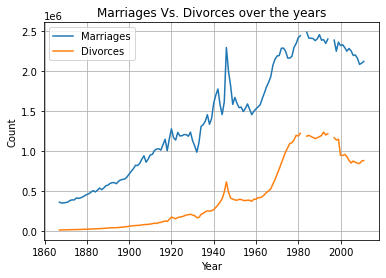

In [221]:
plt.figure()
plt.plot(us_df['Year'],us_df['Marriages'])
plt.plot(us_df['Year'],us_df['Divorces'])
plt.legend(['Marriages','Divorces'])
plt.grid()
plt.xlabel('Year')
plt.ylabel('Count')

plt.title('Marriages Vs. Divorces over the years')
plt.show()

## Question 7

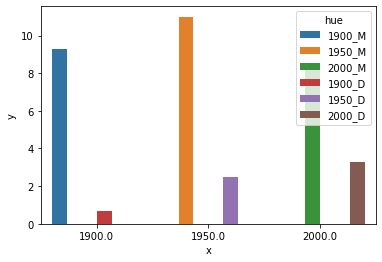

In [222]:
df1=pd.DataFrame({'x':us_df[us_df['Year']==1900]['Year'],'y':us_df['Marriages_per_1000']})
df2=pd.DataFrame({'x':us_df[us_df['Year']==1950]['Year'],'y':us_df['Marriages_per_1000']})
df3=pd.DataFrame({'x':us_df[us_df['Year']==2000]['Year'],'y':us_df['Marriages_per_1000']})
df4=pd.DataFrame({'x':us_df[us_df['Year']==1900]['Year'],'y':us_df['Divorces_per_1000']})
df5=pd.DataFrame({'x':us_df[us_df['Year']==1950]['Year'],'y':us_df['Divorces_per_1000']})
df6=pd.DataFrame({'x':us_df[us_df['Year']==2000]['Year'],'y':us_df['Divorces_per_1000']})

df1['hue']='1900_M'
df4['hue']='1900_D'
df2['hue']='1950_M'
df5['hue']='1950_D'
df3['hue']='2000_M'
df6['hue']='2000_D'


res=pd.concat([df1,df2,df3,df4,df5,df6])
sns.barplot(x='x',y='y',data=res,hue='hue')
plt.show()

# plt.bar(us_df[us_df['Year']==1900]['Year'],us_df['Marriages_per_1000'],label='1900_Mar_per_1000')
# plt.bar(us_df[us_df['Year']==1950]['Year'],us_df['Marriages_per_1000'],label='1950_Mar_per_1000')
# plt.bar(us_df[us_df['Year']==2000]['Year'],us_df['Marriages_per_1000'],label='2000_Mar_per_1000')

# plt.legend()
# plt.grid()
# plt.xlabel('Year')
# plt.ylabel('Count')
# plt.title('Marriages')
# plt.show()

# plt.bar(us_df[us_df['Year']==1900]['Year'],us_df['Divorces_per_1000'],label='1900_Div_per_1000')
# plt.bar(us_df[us_df['Year']==1950]['Year'],us_df['Divorces_per_1000'],label='1950_Div_per_1000')
# plt.bar(us_df[us_df['Year']==2000]['Year'],us_df['Divorces_per_1000'],label='2000_Div_per_1000')
# plt.legend()
# plt.grid()
# plt.xlabel('Year')
# plt.ylabel('Count')
# plt.title('Divorces')
# plt.show()


## Question 8

In [223]:
ac_df = pd.read_csv('actor_kill_counts.csv')
ac_df.index = ac_df['Actor']

Text(0.5, 1.0, 'Kill count of Actors')

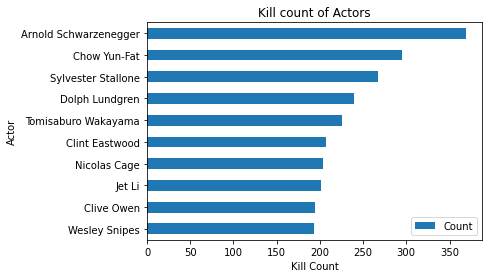

In [224]:
ax = ac_df.sort_values('Count').plot(kind="barh")
ax.set_xlabel("Kill Count")
ax.set_ylabel("Actor")
ax.set_title("Kill count of Actors")

## Question 9

In [225]:
re_df = pd.read_csv('roman-emperor-reigns.csv')
re_df.index = re_df['Emperor']
re_df['Cause_of_Death'] = re_df['Cause_of_Death'].astype('category')
re_df['Cause_of_Death'].unique()

['Possibly assassinated', 'Assassinated', 'Suicide', 'Natural causes', 'Illness', 'Executed', 'Killed in battle', 'Died in captivity']
Categories (8, object): ['Possibly assassinated', 'Assassinated', 'Suicide', 'Natural causes', 'Illness', 'Executed', 'Killed in battle', 'Died in captivity']

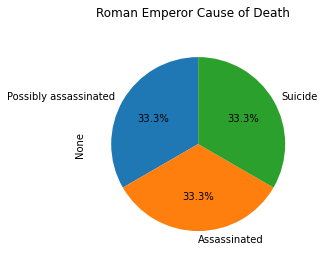

In [226]:
ax = re_df.count().plot(kind='pie',subplots=True,labels=re_df['Cause_of_Death'].unique(),
        startangle=90,
        autopct='%1.1f%%',title="Roman Emperor Cause of Death")

## Question 10

In [227]:
doc_df = pd.read_csv('arcade-revenue-vs-cs-doctorates.csv')
doc_df.index = doc_df['Year']
doc_df.head()

,Year,Total Arcade Revenue (billions),Computer Science Doctorates Awarded (US)
Year,,,
2000,2000,1.196,861
2001,2001,1.176,830
2002,2002,1.269,809
2003,2003,1.240,867
2004,2004,1.307,948


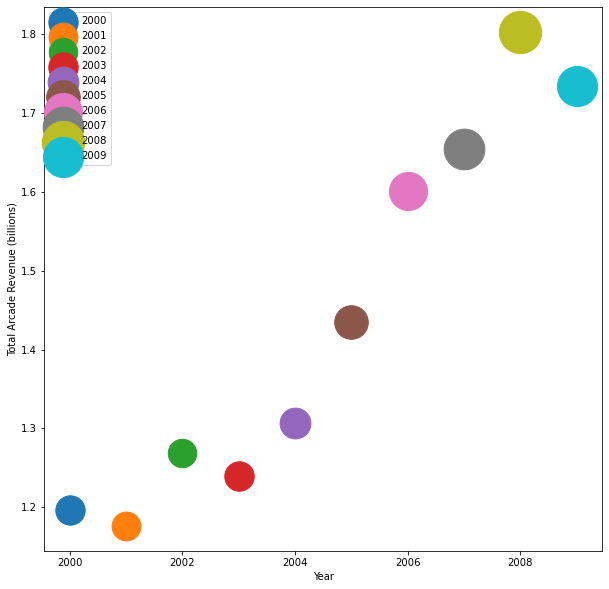

In [228]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot()
i = 0
for year in doc_df.index:
    doc_df[doc_df['Year'] == year].plot.scatter('Year', 'Total Arcade Revenue (billions)','Computer Science Doctorates Awarded (US)', 
                                                      ax=ax, color='C{}'.format(i), 
                                                      label=year)
    i = i+1
ax.legend(loc=2,fontsize='medium')